In [1]:
import pandas as pd
import polars as pl
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [2]:
spisok = [0, 1, 2, 3]

In [3]:
spisok[::-1]

[3, 2, 1, 0]

In [4]:
df = pd.read_json('data.json', orient='records')

In [5]:
#     query - текст запроса
#     ts - timestamp запроса
#     platform - платформа (touch - мобильный устройства, desktop - компьютеры)

In [6]:
df

,query,ts,platform
0,порно фото,1631786697,touch
1,малевич картины,1631806465,desktop
2,Секс,1631781583,touch
3,с днём рождения лена,1631771563,touch
4,зверополис порно,1631787599,touch
...,...,...,...
1203819,бабочка,1631475653,touch
1203820,все республики россии,1631462934,touch
1203821,кухня в стиле лофт,1631432252,touch
1203822,топор,1631449347,desktop


In [7]:
df.isna().sum()

query       0
ts          0
platform    0
dtype: int64

In [8]:
df.dtypes

query       object
ts           int64
platform    object
dtype: object

In [10]:
df['ts'] = pd.to_datetime(df['ts'], unit='s')

In [11]:
df

,query,ts,platform
0,порно фото,2021-09-16 10:04:57,touch
1,малевич картины,2021-09-16 15:34:25,desktop
2,Секс,2021-09-16 08:39:43,touch
3,с днём рождения лена,2021-09-16 05:52:43,touch
4,зверополис порно,2021-09-16 10:19:59,touch
...,...,...,...
1203819,бабочка,2021-09-12 19:40:53,touch
1203820,все республики россии,2021-09-12 16:08:54,touch
1203821,кухня в стиле лофт,2021-09-12 07:37:32,touch
1203822,топор,2021-09-12 12:22:27,desktop


In [12]:
# for i in df['query'][:1000]:
#     print(i)

In [13]:
df[['ts']].agg(['min', 'max'])

,ts
min,2021-08-31 21:00:00
max,2021-09-21 20:59:59


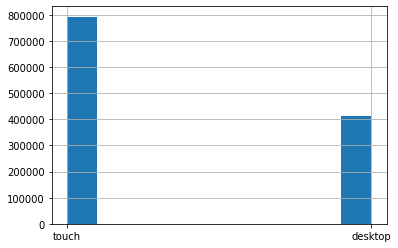

In [14]:
df['platform'].hist()

In [15]:
df.groupby('platform')['query'].value_counts()

platform  query                
desktop   календарь 2021           2804
          таблица менделеева       2631
          картинки                 1647
          порно                    1342
          английский алфавит       1293
                                   ... 
touch     шарики пнг                  1
          штриховка                   1
          экран                       1
          эльза раскраска             1
          ягодка малинка хабиба       1
Name: query, Length: 49500, dtype: int64

In [16]:
df['platform'].value_counts(normalize = True)

touch      0.658118
desktop    0.341882
Name: platform, dtype: float64

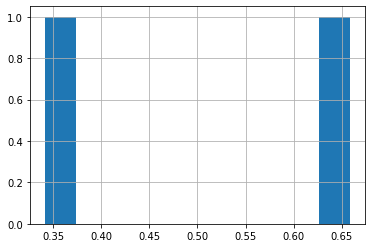

In [17]:
df['platform'].value_counts(normalize = True).hist()

In [18]:
df.loc[(df['platform'] == 'desktop')].groupby('query')['query'].count().sort_values(ascending = False).head(10)

query
календарь 2021                     2804
таблица менделеева                 2631
картинки                           1647
порно                              1342
английский алфавит                 1293
обои на рабочий стол               1143
Одноклассники (социальная сеть)    1116
секс                                895
таблица квадратов                   877
алфавит                             874
Name: query, dtype: int64

In [19]:
top_queries_touch = df[df['platform'] == 'touch']['query'].value_counts().head(10)
top_queries_touch

порно                      7740
секс                       6348
с днём рождения женщине    4903
с днём рождения            3967
с днём рождения мужчине    3623
хентай                     3157
с днем рождения            3005
xxx                        2429
Порно                      2330
календарь 2021             2237
Name: query, dtype: int64

In [20]:
df.loc[(df['platform'] == 'touch')].groupby('query')['query'].count().sort_values(ascending = False).head(10)

query
порно                      7740
секс                       6348
с днём рождения женщине    4903
с днём рождения            3967
с днём рождения мужчине    3623
хентай                     3157
с днем рождения            3005
xxx                        2429
Порно                      2330
календарь 2021             2237
Name: query, dtype: int64

In [21]:
df

,query,ts,platform
0,порно фото,2021-09-16 10:04:57,touch
1,малевич картины,2021-09-16 15:34:25,desktop
2,Секс,2021-09-16 08:39:43,touch
3,с днём рождения лена,2021-09-16 05:52:43,touch
4,зверополис порно,2021-09-16 10:19:59,touch
...,...,...,...
1203819,бабочка,2021-09-12 19:40:53,touch
1203820,все республики россии,2021-09-12 16:08:54,touch
1203821,кухня в стиле лофт,2021-09-12 07:37:32,touch
1203822,топор,2021-09-12 12:22:27,desktop


In [22]:
df2 = df.copy(deep = True)

In [23]:
df2['ts'] = df2['ts'].apply(lambda x: x.date())

In [24]:
df2

,query,ts,platform
0,порно фото,2021-09-16,touch
1,малевич картины,2021-09-16,desktop
2,Секс,2021-09-16,touch
3,с днём рождения лена,2021-09-16,touch
4,зверополис порно,2021-09-16,touch
...,...,...,...
1203819,бабочка,2021-09-12,touch
1203820,все республики россии,2021-09-12,touch
1203821,кухня в стиле лофт,2021-09-12,touch
1203822,топор,2021-09-12,desktop


In [25]:
df2.groupby('ts')['query'].count().sort_values(ascending = False)

ts
2021-09-01    64723
2021-09-21    64308
2021-09-20    63076
2021-09-08    61477
2021-09-13    60527
2021-09-14    60237
2021-09-15    59807
2021-09-09    59562
2021-09-16    58649
2021-09-07    57449
2021-09-19    56978
2021-09-17    56939
2021-09-06    56747
2021-09-12    56219
2021-09-03    53718
2021-09-10    53416
2021-09-05    53263
2021-09-02    52980
2021-09-18    52083
2021-09-11    50298
2021-09-04    48368
2021-08-31     3000
Name: query, dtype: int64

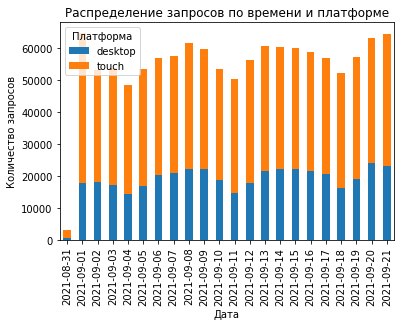

In [26]:
# Группировка запросов по времени
grouped_data = df2.groupby(['ts', 'platform']).size().unstack()

# Построение графика
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Дата')
plt.ylabel('Количество запросов')
plt.title('Распределение запросов по времени и платформе')
plt.legend(title='Платформа')
plt.show()

In [27]:
df2.loc[(df2['platform'] == 'desktop') & (df2['ts'].astype(str) == '2021-09-01')].groupby('query')['query'].count().sort_values(ascending = False).head(10)

query
1 сентября                   201
с 1 сентября                 175
календарь 2021               172
1 сентября картинки          167
с днем знаний                105
День знаний                  103
картинки                      70
поздравление с 1 сентября     62
1 сентября день знаний        58
таблица умножения             57
Name: query, dtype: int64

In [28]:
top_words_touch = df[df['platform'] == 'touch']['query'].str.split().explode().value_counts().head(5)
top_words_desktop = df[df['platform'] == 'desktop']['query'].str.split().explode().value_counts().head(5)

In [29]:
top_words_desktop

на           15877
с            13831
для          13018
календарь     9789
2021          9441
Name: query, dtype: int64